In [307]:
import numpy as np
from fish.util.fileio import read_image, read_images
import matplotlib.pyplot as plt
from glob import glob
from fish.util.plot import proj_fuse
from fish.image.vol import get_stack_freq
stack_freq,_,_ = get_stack_freq('/groups/ahrens/ahrenslab/YuMu/SPIM/active_datasets/20171229/fish1/20171229_1_5_hucrgeco_gfapcochr_7dpf_stimwaist_imagedwiithhigherpower_20171229_135523/raw/')
um_per_pix = .40625
# this should be inferred from metadata...

%matplotlib inline

In [331]:
from functools import reduce
from math import gcd
aspect = np.array((8, 2 * um_per_pix,2 * um_per_pix))
aspect *= 10
aspect //= reduce(gcd, np.round(aspect).astype('int'))
aspect=aspect.astype('int')

In [302]:
fnames = sorted(glob('/groups/ahrens/ahrenslab/davis/data/spim/proc/20171229/fish1/20171229_1_5_hucrgeco_gfapcochr_7dpf_stimwaist_imagedwiithhigherpower_20171229_135523/opto_triggering/trial_mean_cleaned_condition_1/*.tif'))
av_window = np.load('/groups/ahrens/ahrenslab/davis/data/spim/proc/20171229/fish1/20171229_1_5_hucrgeco_gfapcochr_7dpf_stimwaist_imagedwiithhigherpower_20171229_135523/opto_triggering/av_window.npy')

In [323]:
stim_dur = 3.0
onset = np.where((av_window / stack_freq) == 0)[0][0]
offset = np.where((av_window / stack_freq) > stim_dur)[0][0]

/groups/ahrens/home/bennettd/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: All-NaN slice encountered
  """Entry point for launching an IPython kernel.
/groups/ahrens/home/bennettd/fish/fish/util/plot.py:97: RuntimeWarning: All-NaN slice encountered
  projs.append(resize(fun(data, axis), new_dims[indexer], mode='constant', preserve_range=True))


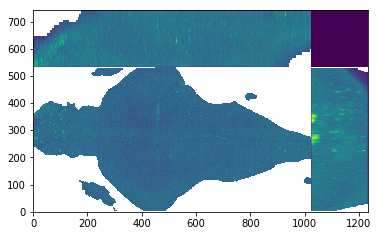

In [342]:
plt.imshow(proj_fuse(np.nanmax(data_c[:onset], axis=0), np.nanmax, aspect=aspect), origin='lower')

/groups/ahrens/home/bennettd/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/groups/ahrens/home/bennettd/fish/fish/util/plot.py:97: RuntimeWarning: All-NaN slice encountered
  projs.append(resize(fun(data, axis), new_dims[indexer], mode='constant', preserve_range=True))


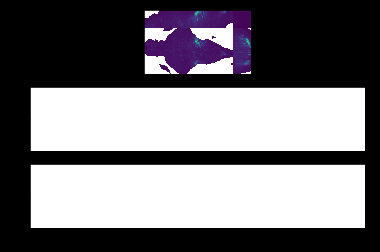

In [349]:
fig, axs = plt.subplots(nrows=3, ncols=1)
fig.set_facecolor('black')
axs[0].imshow(proj_fuse(np.nanmean(data_c[offset:], axis=0) - np.nanmean(data_c[:onset], axis=0), np.nanmax, aspect=aspect), origin='lower')

/groups/ahrens/home/bennettd/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/groups/ahrens/home/bennettd/fish/fish/util/plot.py:97: RuntimeWarning: All-NaN axis encountered
  projs.append(resize(fun(data, axis), new_dims[indexer], mode='constant', preserve_range=True))


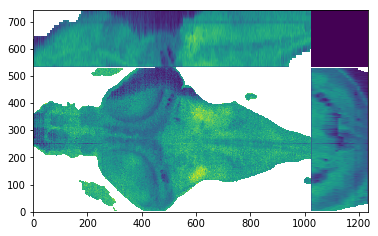

In [344]:
plt.imshow(proj_fuse(np.nanmean(data_c[offset:], axis=0), np.nanmin, aspect=aspect), origin='lower')

In [163]:
from skimage.io import imread, imsave
from skimage.external import tifffile as tf
test_data = np.random.randn(10,10,10,10).astype('float32')
imsave('/groups/ahrens/ahrenslab/davis/test.tif', test_data, imagej=True, metadata={'axes' : 'ZYX', 'resolution_zyx' : [1,.1,.1]})
import ast
ast.literal_eval(b.as_str()[2:-1])['resolution_zyx']

In [148]:
a = tf.TiffFile('/groups/ahrens/ahrenslab/davis/test.tif')

In [6]:
data = read_images(fnames)

In [340]:
# apply a median filter in time to deal with funky missing data
from scipy.ndimage.filters import median_filter
data_mf = median_filter(data, (3,1,1,1))

In [341]:
data_c = data_mf.copy()
data_c[data_c == 0] = np.NAN

In [196]:
data.shape
imsave('/groups/ahrens/ahrenslab/davis/test.tif', data_mf, imagej=True)

In [204]:
data_mf.shape

(25, 21, 532, 1024)

In [216]:
num_plots = data_mf.shape[0] // 5
slices = [np.arange(num_plots) + t for t in range(0, data_mf.shape[0], num_plots)]

/groups/ahrens/home/bennettd/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: All-NaN slice encountered
  
/groups/ahrens/home/bennettd/fish/fish/util/plot.py:97: RuntimeWarning: All-NaN slice encountered
  projs.append(resize(fun(data, axis), new_dims[indexer], mode='constant', preserve_range=True))
/groups/ahrens/home/bennettd/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: All-NaN axis encountered
  if __name__ == '__main__':
/groups/ahrens/home/bennettd/fish/fish/util/plot.py:97: RuntimeWarning: All-NaN axis encountered
  projs.append(resize(fun(data, axis), new_dims[indexer], mode='constant', preserve_range=True))


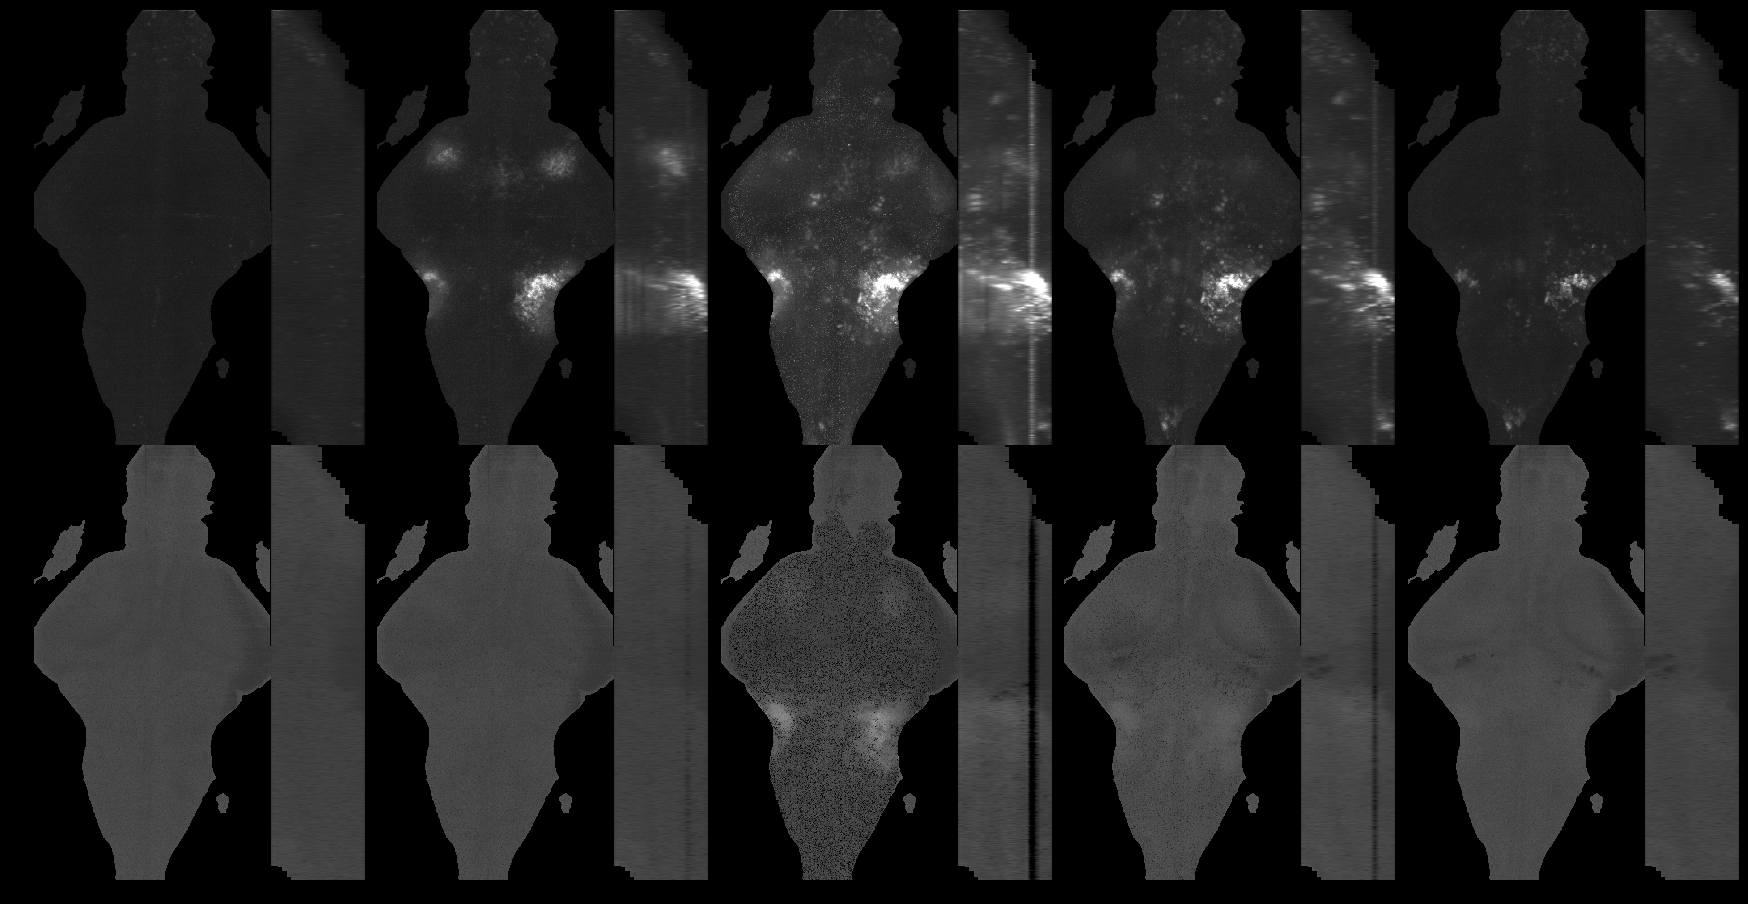

In [301]:
num_plots = data_mf.shape[0] // 5
slices = [np.arange(num_plots) + t for t in range(0, data_mf.shape[0], num_plots)]
nr = 2
nc = num_plots
fig, axs = plt.subplots(figsize=(8 * nc,8 * nr), nrows=nr, ncols=nc)
fig.set_facecolor('black')
for ind, sl in enumerate(slices):
    axs[0][ind].imshow(proj_fuse(np.nanmax(data_c[sl],axis=0), np.nanmax, aspect=aspect.astype('int')).T[:-260], cmap='gray', clim=[0,1])
    axs[1][ind].imshow(proj_fuse(np.nanmin(data_c[sl],axis=0), np.nanmin, aspect=aspect.astype('int')).T[:-260], cmap='gray', clim=[-.1,.4])    
plt.subplots_adjust(wspace=-.6,hspace=0)
[ax.axis('off') for ax in axs.ravel()];